In [ ]:
#Me interesa saber cómo ha variado la experimentación de la corrupción en los peruanos del año 2019-2021

In [1]:
# Importar bibliotecas
# Estas bibliotecas se utilizan para la manipulación de datos, cálculos estadísticos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import DescrStatsW  # Para estadísticas ponderadas

In [50]:
# Aquí se cargan los archivos correspondientes a los años 2019, 2020 y 2021, que contienen los datos de la ENAHO.
data_2019_1 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2019-1.csv", encoding='latin-1')
data_2020_1 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2020-1.csv", encoding='latin-1')
data_2021_1 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2021-1.csv", encoding='latin-1')
data_2019_2 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2019-2.csv", encoding='latin-1')
data_2020_2 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2020-2.csv", encoding='latin-1')
data_2021_2 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2021-2.csv", encoding='latin-1')

# Convertir los nombres de las columnas a minúsculas para facilitar el manejo de datos.
data_2019_1.columns = data_2019_1.columns.str.lower()
data_2020_1.columns = data_2020_1.columns.str.lower()
data_2021_1.columns = data_2021_1.columns.str.lower()
data_2019_2.columns = data_2019_2.columns.str.lower()
data_2020_2.columns = data_2020_2.columns.str.lower()
data_2021_2.columns = data_2021_2.columns.str.lower()

C:\Users\Yoga Slim 7\AppData\Local\Temp\ipykernel_33216\3561646327.py:2: DtypeWarning: Columns (200) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2019_1 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2019-1.csv", encoding='latin-1')
C:\Users\Yoga Slim 7\AppData\Local\Temp\ipykernel_33216\3561646327.py:3: DtypeWarning: Columns (10,15,325) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020_1 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2020-1.csv", encoding='latin-1')
C:\Users\Yoga Slim 7\AppData\Local\Temp\ipykernel_33216\3561646327.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021_1 = pd.read_csv("C:/Users/Yoga Slim 7/Downloads/datos_enaho/Enaho01B-2021-1.csv", encoding='latin-1')
C:\Users\Yoga Slim 7\AppData\Local\Temp\ipykernel_33216\3561646327.py:5: DtypeWarning: Columns (51) have mixed types. Specify dt

In [3]:
# Diccionario de variables utilizadas en el análisis
# 1. `codinfor`: Código de informante.
#    - Tipo: Categórica
#    - Rango: ≥ 1
# 2. `p204`: ¿Es miembro del hogar?
#    - Tipo: Categórica
#    - Códigos:
#      - 1: Sí
#      - 2: No
# 3. `año`: Año de la encuesta.
#    - Tipo: Numérica (entera)
# 4. `famiegob07`: Factor de ponderación para años antes de 2020.
#    - Tipo: Numérica (float)
# 5. `facgob_p`: Factor de ponderación para 2020 en adelante.
#    - Tipo: Numérica (float)
# 6. `p2b_01`: ¿Ha realizado trámites en la Municipalidad Distrital?
#    - Tipo: Categórica
#    - Códigos:
#      - 1: Sí
#      - 2: No
# 7. `p2b_02`: ¿Ha realizado trámites en la Municipalidad Provincial?
#    - Tipo: Categórica
#    - Códigos:
#      - 1: Sí
#      - 2: No
# 8. `p2b_03`: ¿Ha realizado trámites en el Poder Judicial?
#    - Tipo: Categórica
#    - Códigos:
#      - 1: Sí
#      - 2: No
# 9. `p2c_01`: ¿Le solicitaron dar o ofreció voluntariamente en la Municipalidad Distrital?
#    - Tipo: Categórica
#    - Códigos:
#      - 1: Sí, le solicitaron dar y dio.
#      - 2: Sí, le solicitaron dar y no dio.
#      - 3: No, pero dio voluntariamente.
#      - 4: No le solicitaron.
# 10. `p2c_02`: ¿Le solicitaron dar o ofreció voluntariamente en la Municipalidad Provincial?
#     - Tipo: Categórica
#     - Códigos:
#       - 1: Sí, le solicitaron dar y dio.
#       - 2: Sí, le solicitaron dar y no dio.
#       - 3: No, pero dio voluntariamente.
#       - 4: No le solicitaron.
# 11. `p2c_03`: ¿Le solicitaron dar o ofreció voluntariamente en el Poder Judicial?
#     - Tipo: Categórica
#     - Códigos:
#       - 1: Sí, le solicitaron dar y dio.
#       - 2: Sí, le solicitaron dar y no dio.
#       - 3: No, pero dio voluntariamente.
#       - 4: No le solicitaron.

In [51]:
# Unir los datos en un DataFrame
# Se concatenan los datos de los tres años en un único DataFrame para facilitar el análisis.
data = pd.concat([data_2019_1, data_2020_1, data_2021_1, data_2019_2, data_2020_2, data_2021_2], ignore_index=True)

In [52]:
print(data.columns)

Index(['año', 'mes', 'nconglome', 'conglome', 'vivienda', 'hogar', 'codperso',
       'codinfor', 'ubigeo', 'dominio',
       ...
       'p203_02', 'p204_02', 'p205_02', 'p206_02', 'p207_02', 'p208_02',
       'p209_02', 'p301_02', 'factor07', 'factor_p'],
      dtype='object', length=435)


In [53]:
print(data)

         año  mes  nconglome  conglome  vivienda  hogar  codperso  codinfor  \
0       2019    1       7076      5009        41     11         2         2   
1       2019    1       7076      5009        56     11         1         1   
2       2019    1       7076      5009        84     11         1         1   
3       2019    1       7076      5009        98     11         1         1   
4       2019    1       7089      5015        18     11         4         4   
...      ...  ...        ...       ...       ...    ...       ...       ...   
206595  2021   10      40612     21001        47     11         2         2   
206596  2021   10      40612     21001        48     11         1         1   
206597  2021   10      40612     21001        50     11         1         1   
206598  2021   10      40612     21001        54     11         1         1   
206599  2021   10      40612     21001        56     11         1         1   

        ubigeo  dominio  ...  p203_02 p204_02 p205_

In [54]:
# Crear variable `anio`
# Se genera una columna para identificar el año de cada observación.
data['anio'] = data['año'].astype(int)

C:\Users\Yoga Slim 7\AppData\Local\Temp\ipykernel_33216\2844319090.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['anio'] = data['año'].astype(int)


In [55]:
# Ajustar el factor de ponderación
# La columna 'nfactor' se ajusta dependiendo del año para reflejar los pesos muestrales correctos.
data['nfactor'] = data['famiegob07']
data.loc[data['anio'] >= 2020, 'nfactor'] = data['facgob_p']


C:\Users\Yoga Slim 7\AppData\Local\Temp\ipykernel_33216\245369520.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['nfactor'] = data['famiegob07']


In [56]:
print(data)

         año  mes  nconglome  conglome  vivienda  hogar  codperso  codinfor  \
0       2019    1       7076      5009        41     11         2         2   
1       2019    1       7076      5009        56     11         1         1   
2       2019    1       7076      5009        84     11         1         1   
3       2019    1       7076      5009        98     11         1         1   
4       2019    1       7089      5015        18     11         4         4   
...      ...  ...        ...       ...       ...    ...       ...       ...   
206595  2021   10      40612     21001        47     11         2         2   
206596  2021   10      40612     21001        48     11         1         1   
206597  2021   10      40612     21001        50     11         1         1   
206598  2021   10      40612     21001        54     11         1         1   
206599  2021   10      40612     21001        56     11         1         1   

        ubigeo  dominio  ...  p205_02 p206_02 p207_

In [57]:
# Filtrar solo las variables con las que se trabajará
data = data[['anio', 'nfactor'] + cols_tramite_utilizadas + cols_corrupcion_utilizadas]

In [58]:
# Crear listas de columnas relacionadas con trámites y corrupción
# Estas listas ayudan a identificar las columnas específicas para análisis posteriores.
cols_tramite_utilizadas = ['p2b$01', 'p2b$02', 'p2b$03']  # variable para saber si la persona ha realizado trámites en instituciones seleccionadas
cols_corrupcion_utilizadas = ['p2c$01', 'p2c$02', 'p2c$03']  # varaiable para saber si hubo corrupción en el tramite en instituciones seleccionadas
print("Columnas de trámites utilizadas:", cols_tramite_utilizadas)
print("Columnas de corrupción utilizadas:", cols_corrupcion_utilizadas)

Columnas de trámites utilizadas: ['p2b$01', 'p2b$02', 'p2b$03']
Columnas de corrupción utilizadas: ['p2c$01', 'p2c$02', 'p2c$03']


In [59]:
print(data)
print(data.dtypes)

        anio           nfactor p2b$01 p2b$02 p2b$03 p2c$01 p2c$02 p2c$03
0       2019   189.08625793457      2      2      2                     
1       2019  174.897232055664      2      2      2                     
2       2019  94.5431289672852      2      2      2                     
3       2019   189.08625793457      2      2      2                     
4       2019  199.320114135742      2      1      1             4      4
...      ...               ...    ...    ...    ...    ...    ...    ...
206595  2021               NaN    NaN    NaN    NaN    NaN    NaN    NaN
206596  2021               NaN    NaN    NaN    NaN    NaN    NaN    NaN
206597  2021               NaN    NaN    NaN    NaN    NaN    NaN    NaN
206598  2021               NaN    NaN    NaN    NaN    NaN    NaN    NaN
206599  2021               NaN    NaN    NaN    NaN    NaN    NaN    NaN

[206600 rows x 8 columns]
anio        int32
nfactor    object
p2b$01     object
p2b$02     object
p2b$03     object
p2c$01 

In [60]:
data = data.dropna(subset=cols_tramite_utilizadas)

In [61]:
map_values = {'1': 1, '2': 0}
# Aplicar el mapeo
for col in cols_tramite_utilizadas:
    data[col] = data[col].map(map_values)
print(data.dtypes)
print(data)

anio         int32
nfactor     object
p2b$01     float64
p2b$02     float64
p2b$03     float64
p2c$01      object
p2c$02      object
p2c$03      object
dtype: object
        anio           nfactor  p2b$01  p2b$02  p2b$03 p2c$01 p2c$02 p2c$03
0       2019   189.08625793457     0.0     0.0     0.0                     
1       2019  174.897232055664     0.0     0.0     0.0                     
2       2019  94.5431289672852     0.0     0.0     0.0                     
3       2019   189.08625793457     0.0     0.0     0.0                     
4       2019  199.320114135742     0.0     1.0     1.0             4      4
...      ...               ...     ...     ...     ...    ...    ...    ...
103295  2021  1551.50557596244     0.0     0.0     0.0                     
103296  2021  1181.02595147838     0.0     0.0     0.0                     
103297  2021   954.03738812405     0.0     0.0     0.0                     
103298  2021  868.885668543834     0.0     0.0     0.0                    

In [84]:
map_values_corrupcion = {
    '1': 1,
    '2': 1,
    '3': 1,
    '4': 0
}

for col in cols_corrupcion_utilizadas:
    data[col] = data[col].map(map_values_corrupcion)

print(data.dtypes)
print(data)

anio                  int32
nfactor              object
p2b$01              float64
p2b$02              float64
p2b$03              float64
p2c$01              float64
p2c$02              float64
p2c$03              float64
nivel_corrupcion     object
dtype: object
        anio           nfactor  p2b$01  p2b$02  p2b$03  p2c$01  p2c$02  \
0       2019   189.08625793457     0.0     0.0     0.0     NaN     NaN   
1       2019  174.897232055664     0.0     0.0     0.0     NaN     NaN   
2       2019  94.5431289672852     0.0     0.0     0.0     NaN     NaN   
3       2019   189.08625793457     0.0     0.0     0.0     NaN     NaN   
4       2019  199.320114135742     0.0     1.0     1.0     NaN     NaN   
...      ...               ...     ...     ...     ...     ...     ...   
103295  2021  1551.50557596244     0.0     0.0     0.0     NaN     NaN   
103296  2021  1181.02595147838     0.0     0.0     0.0     NaN     NaN   
103297  2021   954.03738812405     0.0     0.0     0.0     NaN     N

In [85]:
data[cols_corrupcion_utilizadas] = data[cols_corrupcion_utilizadas].fillna(0).astype(int)
print(data)

        anio           nfactor  p2b$01  p2b$02  p2b$03  p2c$01  p2c$02  \
0       2019   189.08625793457     0.0     0.0     0.0       0       0   
1       2019  174.897232055664     0.0     0.0     0.0       0       0   
2       2019  94.5431289672852     0.0     0.0     0.0       0       0   
3       2019   189.08625793457     0.0     0.0     0.0       0       0   
4       2019  199.320114135742     0.0     1.0     1.0       0       0   
...      ...               ...     ...     ...     ...     ...     ...   
103295  2021  1551.50557596244     0.0     0.0     0.0       0       0   
103296  2021  1181.02595147838     0.0     0.0     0.0       0       0   
103297  2021   954.03738812405     0.0     0.0     0.0       0       0   
103298  2021  868.885668543834     0.0     0.0     0.0       0       0   
103299  2021    706.6200700185     0.0     0.0     0.0       0       0   

        p2c$03 nivel_corrupcion  
0            0    No corrupción  
1            0    No corrupción  
2        

In [86]:
# Función para clasificar corrupción con 4 categorías
# 1: No experimentó corrupción
# 2: Bajo (1 institución)
# 3: Medio (2 instituciones)
# 4: Alto (3 instituciones)
def clasificar_corrupcion(df, cols_tramite_utilizadas, cols_corrupcion_utilizadas):
    # Filtrar observaciones con trámites
    df = df[df[cols_tramite].eq(1).any(axis=1)]
def clasificar_corrupcion(df, cols_tramite_utilizadas, cols_corrupcion_utilizadas):
    # Filtrar observaciones con trámites
    df['nivel_corrupcion'] = 'No corrupción'
    df.loc[df[cols_corrupcion_utilizadas].isin([1]).any(axis=1), 'nivel_corrupcion'] = 'Bajo'
    df.loc[df[cols_corrupcion_utilizadas].isin([1]).sum(axis=1) == 2, 'nivel_corrupcion'] = 'Medio'
    df.loc[df[cols_corrupcion_utilizadas].isin([1]).sum(axis=1) == 3, 'nivel_corrupcion'] = 'Alto'
    return df

In [87]:
print(data)

        anio           nfactor  p2b$01  p2b$02  p2b$03  p2c$01  p2c$02  \
0       2019   189.08625793457     0.0     0.0     0.0       0       0   
1       2019  174.897232055664     0.0     0.0     0.0       0       0   
2       2019  94.5431289672852     0.0     0.0     0.0       0       0   
3       2019   189.08625793457     0.0     0.0     0.0       0       0   
4       2019  199.320114135742     0.0     1.0     1.0       0       0   
...      ...               ...     ...     ...     ...     ...     ...   
103295  2021  1551.50557596244     0.0     0.0     0.0       0       0   
103296  2021  1181.02595147838     0.0     0.0     0.0       0       0   
103297  2021   954.03738812405     0.0     0.0     0.0       0       0   
103298  2021  868.885668543834     0.0     0.0     0.0       0       0   
103299  2021    706.6200700185     0.0     0.0     0.0       0       0   

        p2c$03 nivel_corrupcion  
0            0    No corrupción  
1            0    No corrupción  
2        

In [88]:
data = clasificar_corrupcion(data, cols_tramite_utilizadas, cols_corrupcion_utilizadas)

In [89]:
print(data)

        anio           nfactor  p2b$01  p2b$02  p2b$03  p2c$01  p2c$02  \
0       2019   189.08625793457     0.0     0.0     0.0       0       0   
1       2019  174.897232055664     0.0     0.0     0.0       0       0   
2       2019  94.5431289672852     0.0     0.0     0.0       0       0   
3       2019   189.08625793457     0.0     0.0     0.0       0       0   
4       2019  199.320114135742     0.0     1.0     1.0       0       0   
...      ...               ...     ...     ...     ...     ...     ...   
103295  2021  1551.50557596244     0.0     0.0     0.0       0       0   
103296  2021  1181.02595147838     0.0     0.0     0.0       0       0   
103297  2021   954.03738812405     0.0     0.0     0.0       0       0   
103298  2021  868.885668543834     0.0     0.0     0.0       0       0   
103299  2021    706.6200700185     0.0     0.0     0.0       0       0   

        p2c$03 nivel_corrupcion  
0            0    No corrupción  
1            0    No corrupción  
2        

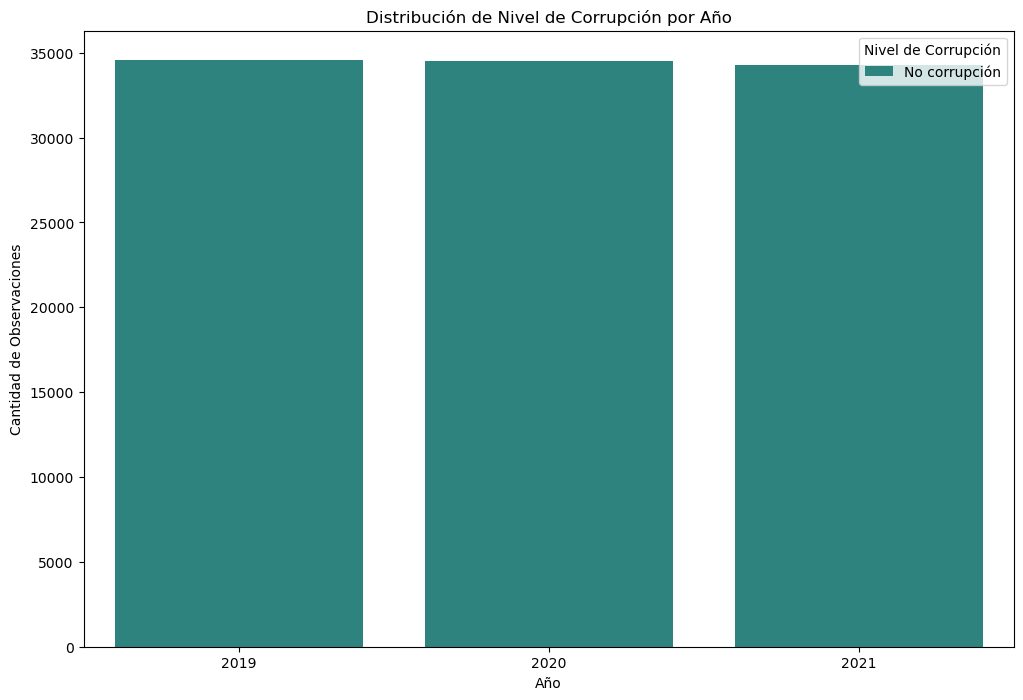

In [90]:
data_agrupada = (
    data.groupby(['anio', 'nivel_corrupcion'])
    .size()
    .reset_index(name='count')  # Contar las observaciones
)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(
    x='anio',
    y='count',
    hue='nivel_corrupcion',
    data=data_agrupada,
    palette='viridis'
)
plt.title("Distribución de Nivel de Corrupción por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Observaciones")
plt.legend(title="Nivel de Corrupción")
plt.show()